In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew

In [73]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### So, as we see above, we have 2 data sets - train -- to trainn our model. Test data set is to predict the house prices. Lets start by exploring the train data.

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 1. Analysing correlation

### Now, after imputing the nan values, we will move to correlation. We can plot a heat map to look at the correlation between the feature variables and target variables

In [8]:
corr = train.corr()

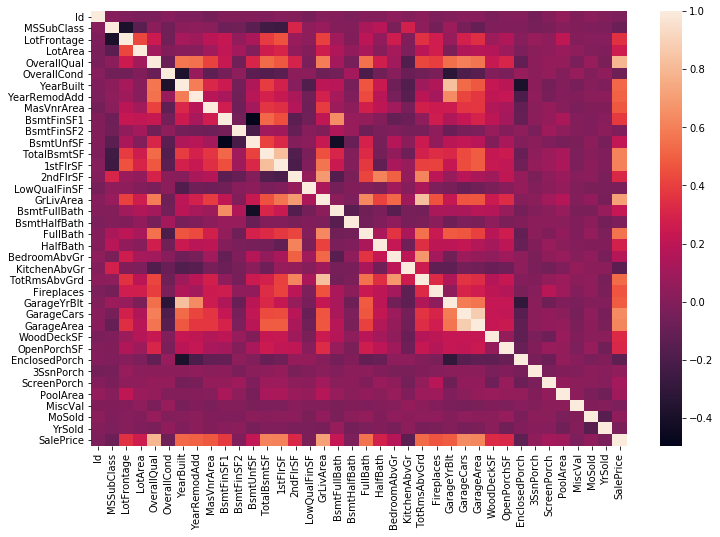

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)
plt.show()

#### Above heat map looks very confusing, so i figured out a better wayt to plot heatmap with important correlations in descending order

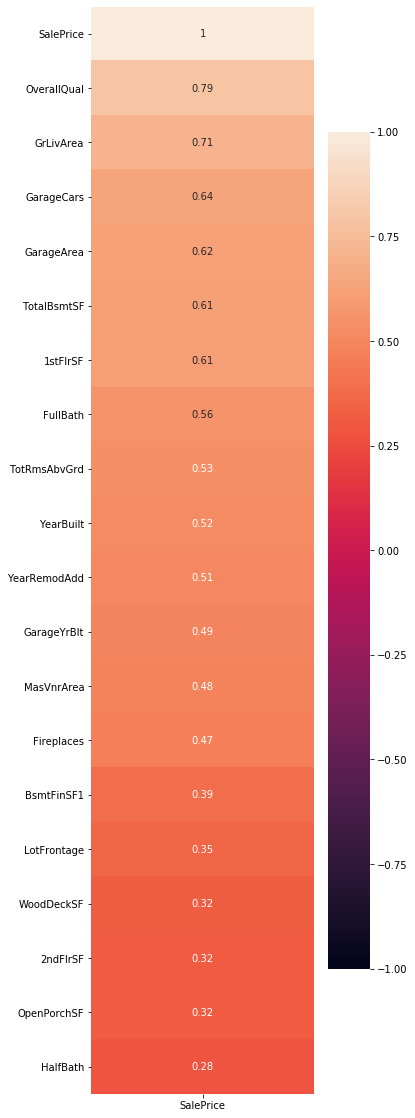

In [10]:
plt.figure(figsize = (5,20))
sns.heatmap(corr[["SalePrice"]].sort_values(by = "SalePrice", ascending = False).head(20),vmin = -1, annot = True)
plt.show()

### In the above plot we can see the most important feature variables which can affect the Sale price. From the above observation we will create a new table with only few important features and look at their relation with target variable in more depth.


In [11]:
imp_feat = corr.index[abs(corr["SalePrice"])>0.4]

In [12]:
imp_feat

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

#### now, swe can drop some of the columns from imp_feat, lets again plot a heatmap to check which we can drop

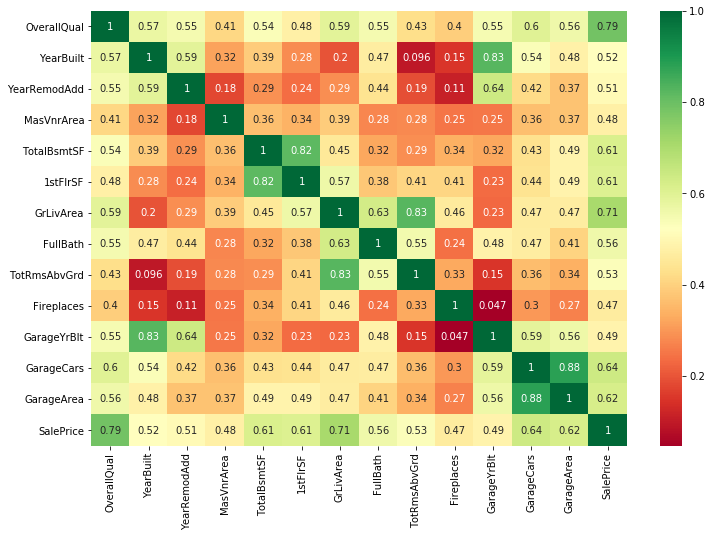

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(train[imp_feat].corr(), annot = True, cmap="RdYlGn")
plt.show()

What we get from the above heatmap : 
1. OveralQual, GrLivArea,TotalBsmtSF, GarageCars and GarageArea are the features which are highly correlated with SalePrice
2. GarageCars and GarageArea are highly correlated with each other, which shows multicollinearity. This means they give almost the same information. So, we vcan pick either of the fearures for furthur analysis.
3. TotalBsmtSF and 1stFlrSF also shows multicollieanrity. We will keep TotalBsmtSF.
4. We will keep FullBath.
5. Between Total rooms above ground and Gr Live Area, we will chose GrLiv Area.
6. We will keep YearBuilt.

Now we filtered out some better features, lets plot a scatter plot.

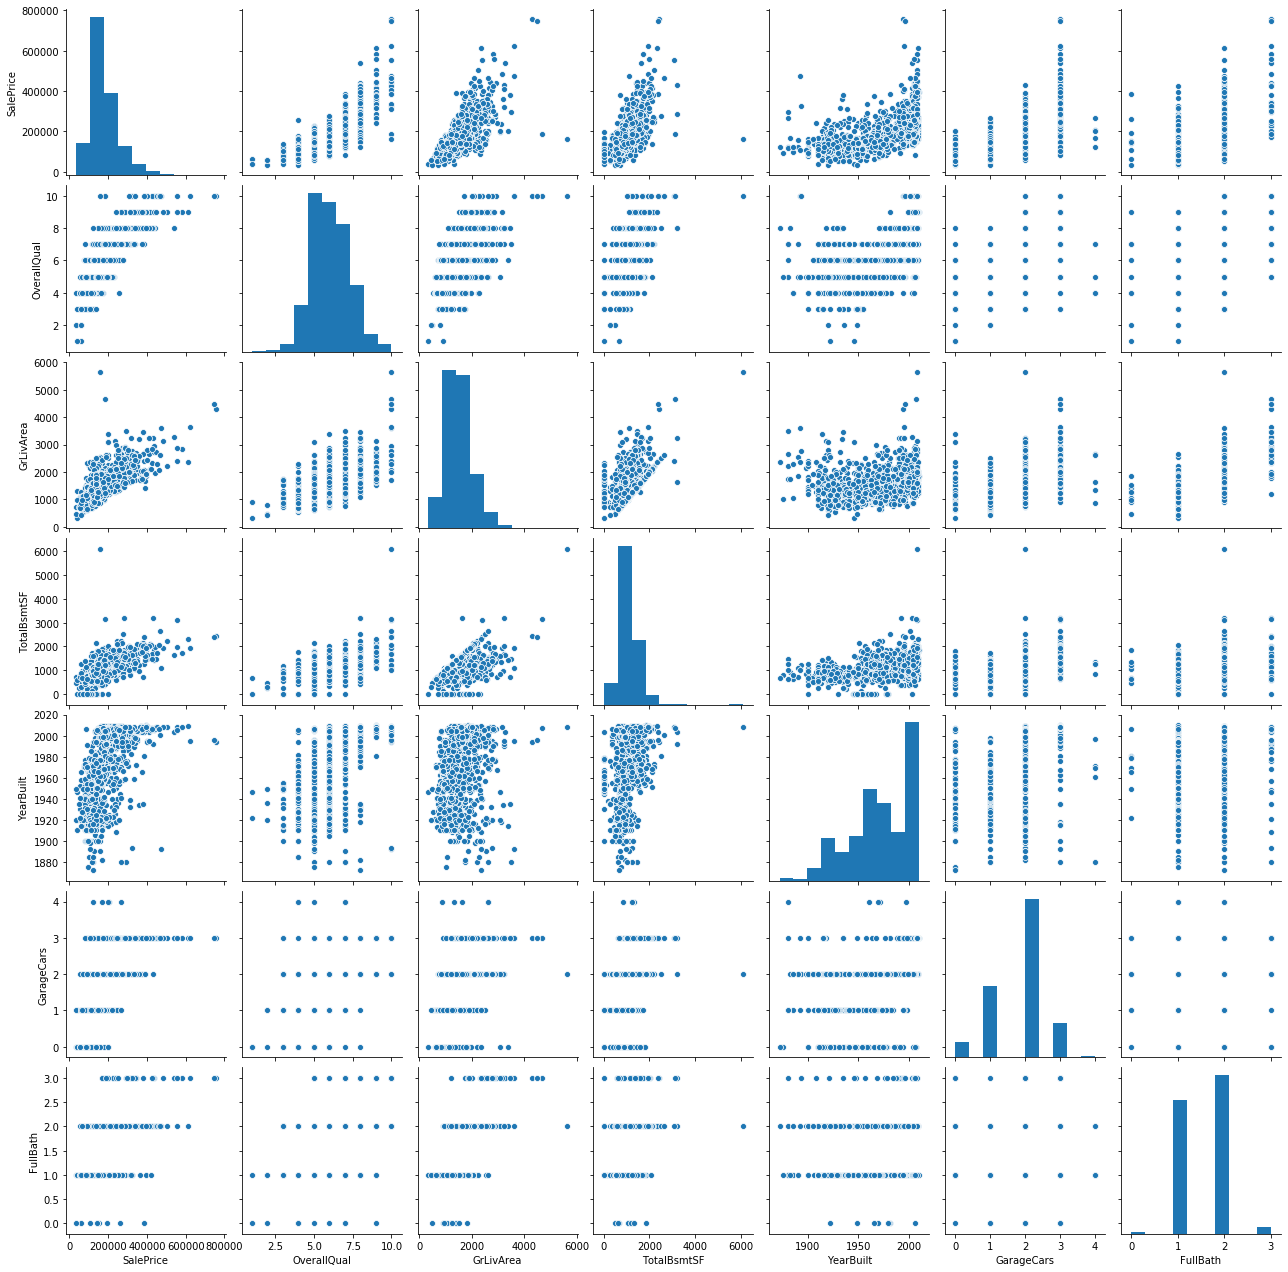

In [14]:
columns = ["SalePrice","OverallQual","GrLivArea", "TotalBsmtSF", "YearBuilt", "GarageCars" ,"FullBath"]
sns.pairplot(train[columns],height = 2.5)
plt.show()

Lets look at the correlation more closely

1. OverallQual vs SalePrice

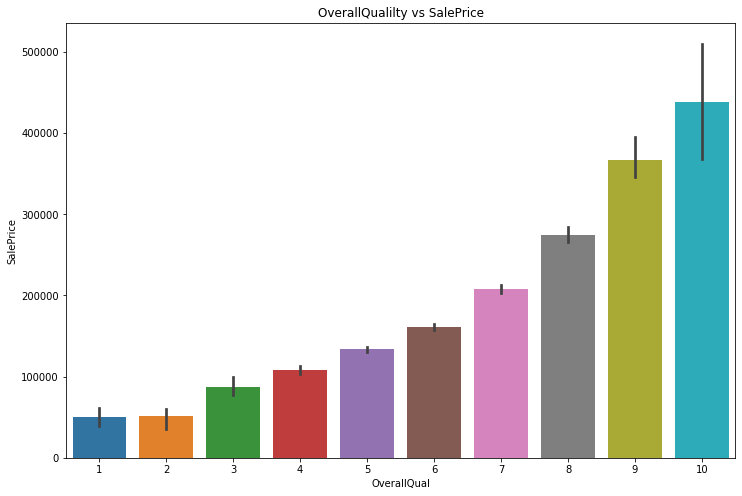

In [15]:
plt.figure(figsize = (12,8))
sns.barplot(train["OverallQual"],train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("OverallQualilty vs SalePrice")
plt.show()

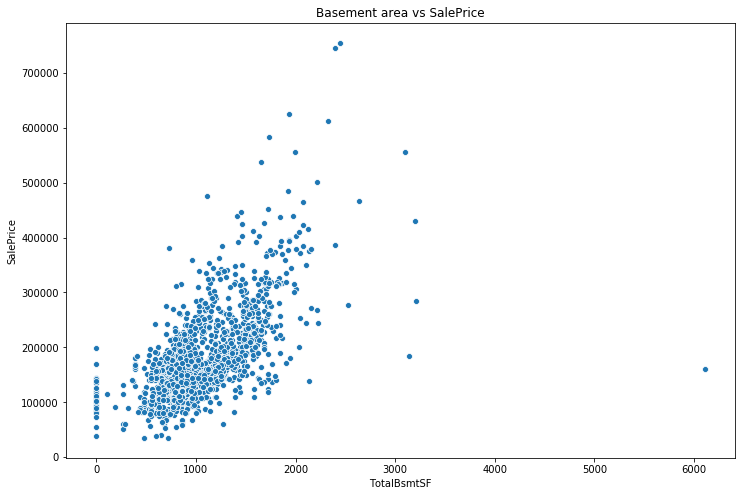

In [16]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = train["TotalBsmtSF"],y= train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.title("Basement area vs SalePrice")
plt.show()

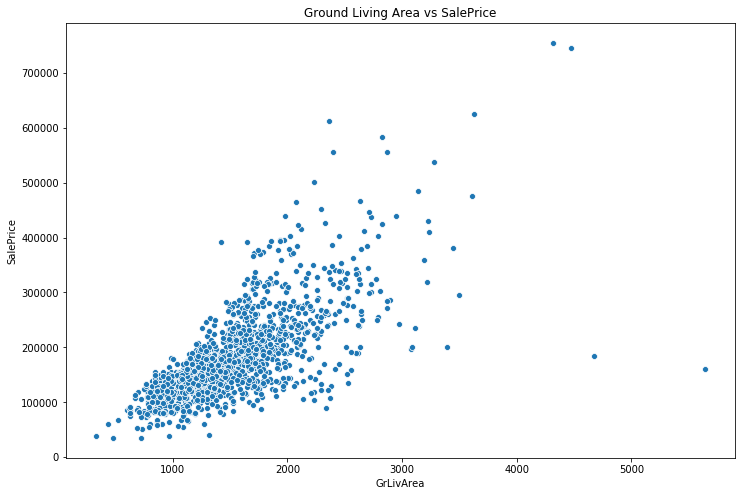

In [17]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = train["GrLivArea"],y= train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Ground Living Area vs SalePrice")
plt.show()

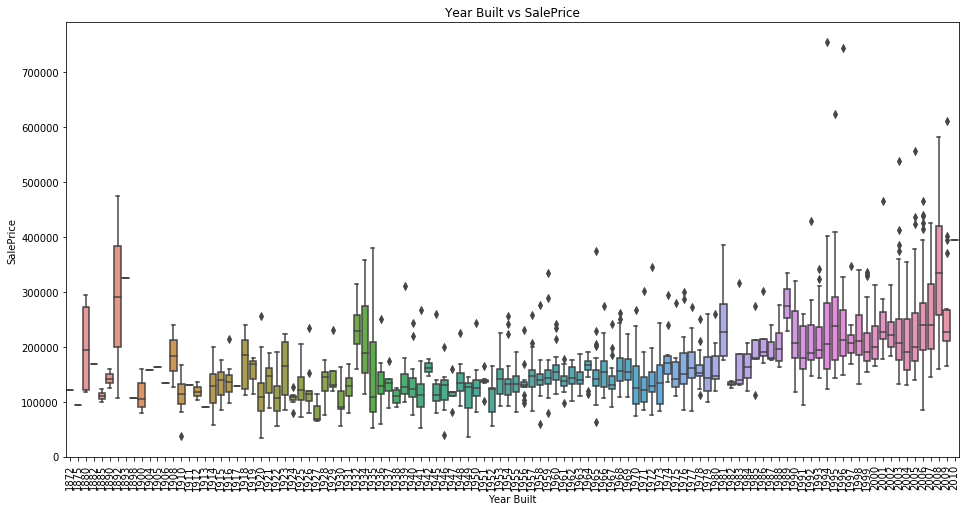

In [18]:
plt.figure(figsize = (16,8))
sns.boxplot(x = train["YearBuilt"],y= train["SalePrice"])
plt.xlabel("Year Built")
plt.xticks(rotation = 90)
plt.ylabel("SalePrice")
plt.title("Year Built vs SalePrice")
plt.show()

The price of the houses increase with the year built. New houses are more costly.

# 2. Missing data

#### Lets check and deal with the missing or nan values

In [19]:
train_nan = train.isna().sum().sort_values(ascending = False)
train_nan[train_nan > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### We will replace the missing values with the median for numerical columns and mode for categorical columns

In [20]:
train.loc[train.PoolQC.notnull(),"PoolQC"].mode()

0    Gd
dtype: object

In [74]:
train["PoolQC"].fillna("Gd", inplace = True)
train.PoolQC.isnull().sum()

0

In [22]:
train.loc[train.MiscFeature.notnull(),"MiscFeature"].mode()

0    Shed
dtype: object

In [75]:
train["MiscFeature"].fillna("Shed", inplace = True)
train.MiscFeature.isnull().sum()

0

In [24]:
train.loc[train.Alley.notnull(),"Alley"].mode()

0    Grvl
dtype: object

In [76]:
train["Alley"].fillna("Grvl", inplace = True)
train.Alley.isnull().sum()

0

In [26]:
train.loc[train.Fence.notnull(),"Fence"].mode()

0    MnPrv
dtype: object

In [77]:
train["Fence"].fillna("MnPrv", inplace = True)
train.Fence.isnull().sum()

0

In [28]:
train.loc[train.FireplaceQu.notnull(),"FireplaceQu"].mode()

0    Gd
dtype: object

In [78]:
train["FireplaceQu"].fillna("Gd", inplace = True)
train.FireplaceQu.isnull().sum()

0

In [30]:
train.loc[train.LotFrontage.notnull(),"LotFrontage"].median()

69.0

In [79]:
train["LotFrontage"].fillna(69, inplace = True)
train.LotFrontage.isnull().sum()

0

In [80]:
train['GarageCond'].fillna('No Garage', inplace=True)
train['GarageType'].fillna('No Garage', inplace=True)
train['GarageYrBlt'].fillna(round(train['GarageYrBlt'].median(), 1), inplace=True)
train['GarageFinish'].fillna('No Garage', inplace=True)
train['GarageQual'].fillna('No Garage', inplace=True)
train['BsmtExposure'].fillna('No Basement', inplace=True)
train['BsmtFinType2'].fillna('No Basement', inplace=True)
train['BsmtFinType1'].fillna('No Basement', inplace=True)
train['BsmtCond'].fillna('No Basement', inplace=True)
train['BsmtQual'].fillna('No Basement', inplace=True)
train['MasVnrArea'].fillna(0.0, inplace=True)
train['MasVnrType'].fillna('None', inplace=True)
train['Electrical'].fillna('Mixed', inplace=True)

In [33]:
train.isna().sum().sum()

0

# 3. Outliers

### Now, we will do some analysis on our Target variable i.e Sale Price

In [34]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lets check for outliers and plot a box plot of SalePrice over whole data set

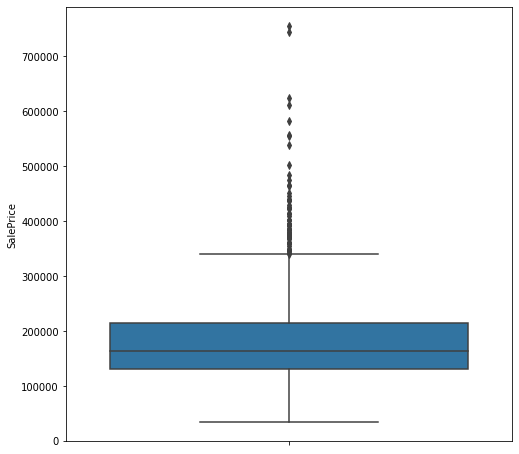

In [35]:
plt.figure(figsize = (8,8))
sns.boxplot(x= train["SalePrice"], data = train, orient = "v")
plt.show()

We can see outliers and so we will remove them by setting a threshold. I am using a threshold of 45,0000

In [81]:
train = train.drop(train[train["SalePrice"] > 450000].index,axis = 0)

In [37]:
train[train["SalePrice"] > 450000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [38]:
train.shape

(1446, 81)

### Next is GrLivArea

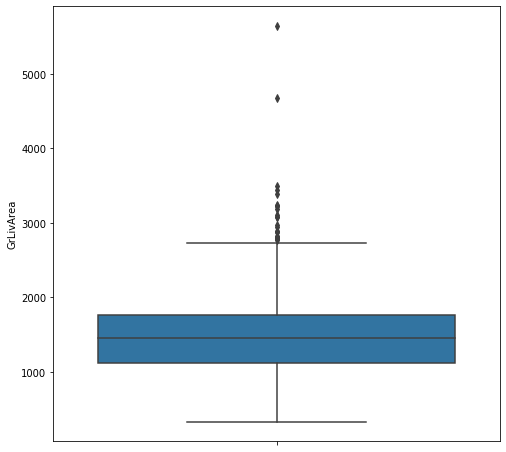

In [40]:
plt.figure(figsize = (8,8))
sns.boxplot(x= train["GrLivArea"], data = train, orient = "v")
plt.show()

In [82]:
train = train.drop(train[train["GrLivArea"] > 3500].index,axis = 0)

### Next is TotalBsmtSF

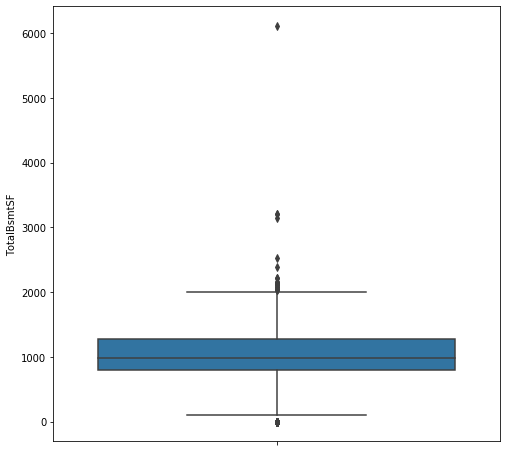

In [42]:
plt.figure(figsize = (8,8))
sns.boxplot(x= train["TotalBsmtSF"], data = train, orient = "v")
plt.show()

In [83]:
train = train.drop(train[train["TotalBsmtSF"] > 4000].index,axis = 0)

In [47]:
train.shape

(1444, 81)

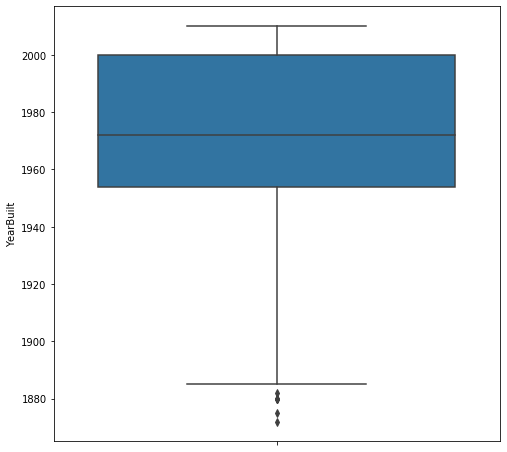

In [48]:
plt.figure(figsize = (8,8))
sns.boxplot(x= train["YearBuilt"], data = train, orient = "v")
plt.show()

In [49]:
train[train["YearBuilt"] < 1880]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1137,1138,50,RL,54.0,6342,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,94000
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,122000


In [84]:
train = train.drop(train[train["YearBuilt"] < 1880].index,axis = 0)

# 4. Normalization

We will plot distribution plots for target variable and few best feature variables

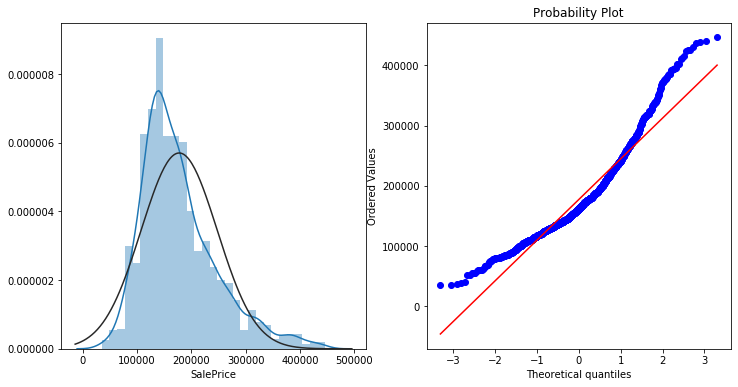

In [85]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train["SalePrice"], fit = norm, ax = ax[0])

res = stats.probplot(train["SalePrice"],plot = plt)
plt.show()

The above distribution deviates from normal distribution but still has appreeraciable positive skewness.
Lets apply log transformation and check the plots again

In [86]:
train['SalePrice'] = np.log(train['SalePrice'])

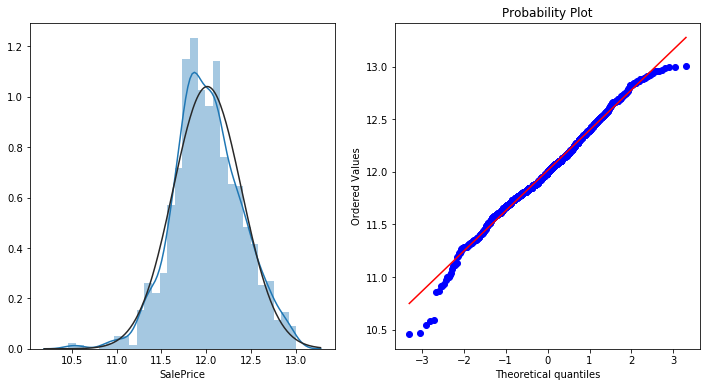

In [87]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train["SalePrice"], fit = norm, ax = ax[0])

res = stats.probplot(train["SalePrice"],plot = plt)
plt.show()

### Tada!

Next, GrLivArea 

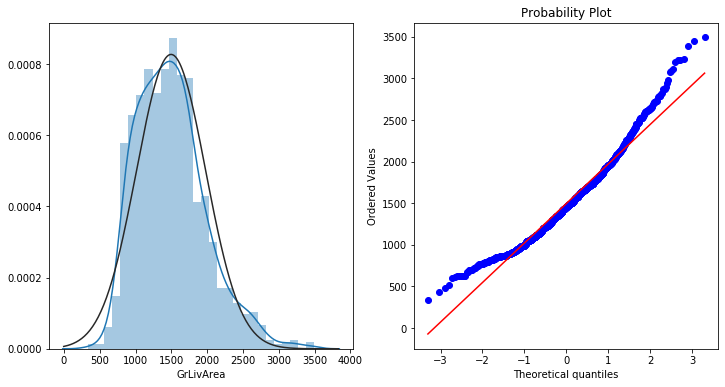

In [88]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train["GrLivArea"], fit = norm, ax = ax[0])

res = stats.probplot(train["GrLivArea"],plot = plt)
plt.show()

In [89]:
train['GrLivArea'] = np.log(train['GrLivArea'])

In [101]:
train['GrLivArea']

0       7.444249
1       7.140453
2       7.487734
3       7.448334
4       7.695303
          ...   
1455    7.406711
1456    7.636752
1457    7.757906
1458    6.982863
1459    7.135687
Name: GrLivArea, Length: 1442, dtype: float64

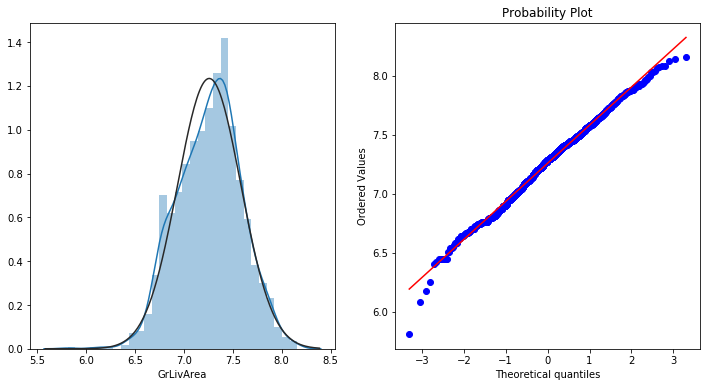

In [90]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train["GrLivArea"], fit = norm, ax = ax[0])

res = stats.probplot(train["GrLivArea"],plot = plt)
plt.show() 

Next, TotalBsmtSF

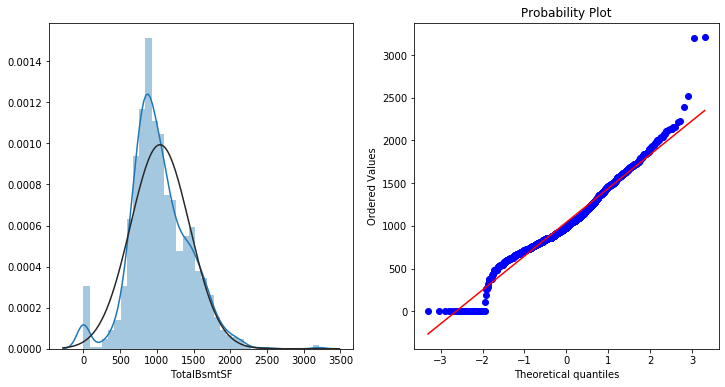

In [92]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train["TotalBsmtSF"], fit = norm, ax = ax[0])

res = stats.probplot(train["TotalBsmtSF"],plot = plt)
plt.show()

We cannot do log transformation for TotalBsmtSF because its has value '0' in some rows. We will apply log on only non zero values.

In [97]:
train.loc[train["TotalBsmtSF"] >0 , "TotalBsmtSF"] = np.log(train.loc[train["TotalBsmtSF"] >0 , "TotalBsmtSF"])

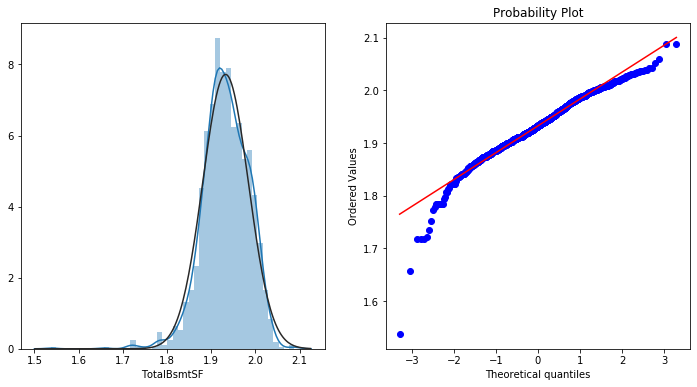

In [110]:
fig, ax = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train[train["TotalBsmtSF"]>0]["TotalBsmtSF"], fit = norm, ax = ax[0])

res = stats.probplot(train[train["TotalBsmtSF"]>0]["TotalBsmtSF"],plot = plt)
plt.show()

Last thing in data pre processing is the dummy variable of the categorical variables

In [111]:
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


## Test Data Preparation

### 1. Missing values

In [113]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [114]:
test_nan = test.isna().sum().sort_values(ascending = False)
test_nan[test_nan > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

### We will use the same imputation values as we did for our train data

In [116]:
test["PoolQC"].fillna("Gd", inplace = True)
test['GarageCond'].fillna('No Garage', inplace=True)
test['GarageType'].fillna('No Garage', inplace=True)
test['GarageYrBlt'].fillna(round(test['GarageYrBlt'].median(), 1), inplace=True)
test['GarageFinish'].fillna('No Garage', inplace=True)
test['GarageQual'].fillna('No Garage', inplace=True)
test['BsmtExposure'].fillna('No Basement', inplace=True)
test['BsmtFinType2'].fillna('No Basement', inplace=True)
test['BsmtFinType1'].fillna('No Basement', inplace=True)
test['BsmtCond'].fillna('No Basement', inplace=True)
test['BsmtQual'].fillna('No Basement', inplace=True)
test['MasVnrArea'].fillna(0.0, inplace=True)
test['MasVnrType'].fillna('None', inplace=True)
test['Electrical'].fillna('Mixed', inplace=True)
test["MiscFeature"].fillna("Shed", inplace = True)
test["Alley"].fillna("Grvl", inplace = True)
test["Fence"].fillna("MnPrv", inplace = True)
test["FireplaceQu"].fillna("Gd", inplace = True)
test["LotFrontage"].fillna(69, inplace = True)
test["MSZoning"].fillna("RL", inplace = True)
test["Functional"].fillna("Typ", inplace = True)
test["Utilities"].fillna("AllPub", inplace = True)
test["BsmtFullBath"].fillna(0, inplace = True)
test["BsmtHalfBath"].fillna(0, inplace = True)
test["TotalBsmtSF"].fillna(988, inplace = True)
test["SaleType"].fillna("WD", inplace = True)
test["GarageArea"].fillna(0, inplace = True)
test["Exterior1st"].fillna("VinylSd", inplace = True)
test["BsmtUnfSF"].fillna(0, inplace = True)
test["Exterior2nd"].fillna("VinylSd", inplace = True)
test["KitchenQual"].fillna("TA", inplace = True)
test["GarageCars"].fillna(2, inplace = True)
test["BsmtFinSF2"].fillna(0, inplace = True)
test["BsmtFinSF1"].fillna(0, inplace = True)

Get dummies

In [141]:
test = pd.get_dummies(test)
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


# Modeling

Import Libraries for SkLearn

In [161]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

### Splitting the data

In [143]:
X = train.drop(["SalePrice"],axis = 1)
y = train["SalePrice"]

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
print("Train set : ", X_train.shape,y_train.shape)
print("Test set : ", X_test.shape,y_test.shape)

Train set :  (1153, 298) (1153,)
Test set :  (289, 298) (289,)


### Training the data

In [152]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

### Prediction using validation data

In [153]:
forest_pred = forest_model.predict(X_test)

In [155]:
print("Mean Squared error for Random Forest is : ",mean_squared_error(y_test,forest_pred))

Mean Squared error for Random Forest is :  0.017946708359674417
